In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


from matplotlib import pyplot as plt
_df_0['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total_rooms'].plot(kind='hist', bins=20, title='total_rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
dataset.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]>

Since our dataset does not contain any string column, one hot encoding is not needed henceforth we are skipping the step of encoding and directly apply the multiple linear regression to our california_housing _train dataset. Our target value is median_house_price, which will be our y variable.

In [5]:
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(13600, 8)

In [7]:
print(X_train.head())
print(X_train.dtypes)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12036    -121.41     38.57                16.0       4429.0          1124.0   
8210     -118.44     34.19                19.0       3487.0           959.0   
15153    -122.26     37.77                52.0       1565.0           315.0   
8022     -118.42     34.24                36.0       1181.0           220.0   
133      -116.06     34.15                15.0      10377.0          2331.0   

       population  households  median_income  
12036      1538.0       960.0         3.2443  
8210       2278.0       835.0         2.6709  
15153       637.0       297.0         4.7778  
8022        775.0       218.0         4.7228  
133        4507.0      1807.0         2.2466  
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dty

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (13600, 8)
y_train shape: (13600,)


In [9]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = multi_regressor.predict(X_test)

In [11]:
print(multi_regressor.coef_,)
print(multi_regressor.intercept_)

[-4.33863939e+04 -4.31113378e+04  1.15576940e+03 -9.28217711e+00
  1.23826022e+02 -3.71486621e+01  4.07777661e+01  4.05767360e+04]
-3644153.7773249103


In [12]:
test_sample_data = [[-114.31, 34.19, 15.0, 5612.0, 1283.0, 1015.0, 472.0, 1.4936]]
print(multi_regressor.predict(test_sample_data))

[7628.64795273]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.632101417157948


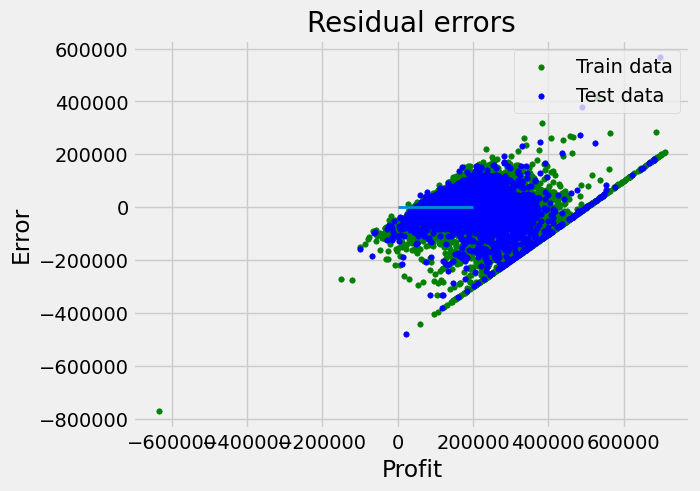

In [14]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 15, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 15, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 50142.797420822986
MSE: 4738017183.145092
RMSE: 68833.25637469937


**POLYNOMIAL REGRESSION**

In [16]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)

In [17]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [18]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(13600, 8)

In [20]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [25]:
y_train_pred = poly_regressor.predict(poly.fit_transform(X_train))
y_test_pred = poly_regressor.predict(poly.fit_transform(X_test))


In [30]:
# Training metrics
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Testing metrics
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Training Scores:")
print(f"R2: {r2_train}, MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}")
print("Testing Scores:")
print(f"R2: {r2_test}, MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}")

Training Scores:
R2: 0.7479680929575887, MAE: 42182.58113916808, MSE: 3424964362.26088, RMSE: 58523.195079052886
Testing Scores:
R2: 0.6250568081879389, MAE: 44063.007133546875, MSE: 4828741855.391982, RMSE: 69489.1491917406


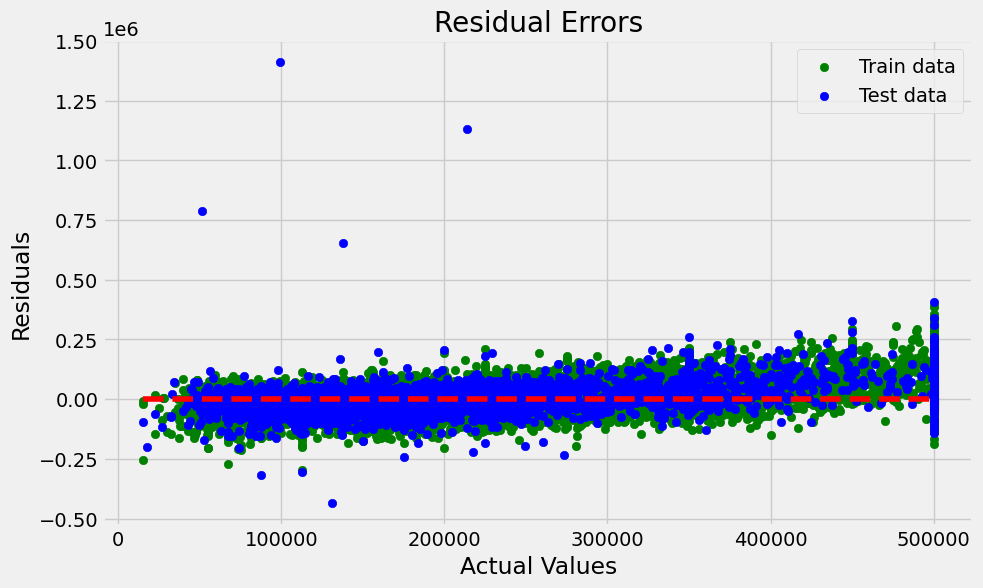

In [29]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_residuals, color="green", label="Train data")
plt.scatter(y_test, test_residuals, color="blue", label="Test data")
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors="red", linestyles="dashed")
plt.title("Residual Errors")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()


The graph above visualizes how well our model is predicting, red line shows an ideal situation where the prediction has zero residual erros.

Green dots show errors for data used to train the model.

Blue dots show errors for new data the model hasn't seen.

Randomly scattered dots around the red line (zero) indicate a good model fit.

Clusters or outliers suggest potential issues like unusual data points or limitations of the model.

Similar patterns for green and blue dots suggest the model generalizes well to new data.

Moreover, the graph helps assess how accurately the model predicts values.

The residuals are centered around zero and randomly distributed, suggesting the model is well-fitted to the data. However, there is a chance that our model has been overfitted considering all the residual errors of test and train dataset lie similarly.

# **Now, we will only apply multiple linear regression to one X variable only, meaning we use one feature for the model training.**

In [35]:
# We are using "households as our X variable"
X = dataset[['households']]
y = dataset['median_house_value']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(13600, 1)

In [37]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = multi_regressor.predict(X_test)
print(multi_regressor.coef_,)
print(multi_regressor.intercept_)
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

[16.46691194]
200069.48546231526
Variance score: 0.004478647753660692


In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 90525.47026475861
MSE: 12820917212.274315
RMSE: 113229.48914604497


In [42]:
test_sample_data = [[472.0]]
print(multi_regressor.predict(test_sample_data))

[207841.86789843]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
